# Trabalho Final Integrado - Mineração de Dados
**Grupo:** Bruno, Artur, Denis, Luccas e Marlon

**Professor:** Vagner S. Macedo
<br>
<br>
## 1. Objetivo do Projeto
A empresa **MinerAI** enfrenta problemas financeiros devido à concessão de crédito para maus pagadores. Nosso objetivo é realizar uma análise exploratória (EDA) robusta e desenvolver um modelo preditivo para identificar padrões de risco.

Neste notebook, realizaremos um **tratamento avançado de dados** para mitigar a oscilação de valores nulos e inconsistentes, garantindo uma predição mais assertiva.

# 2. Configuração e Carga dos Dados - Bruno
Garantimos a leitura correta do arquivo.

In [6]:
# Importação de Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações Visuais
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)

# Carga dos Dados (Tratamento de Encoding e Separador)
url = "https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/credit.csv"

try:
    # Tenta ler com separador vírgula (padrão)
    df = pd.read_csv(url, encoding='iso-8859-1', sep=',', header=0, low_memory=False)
except:
    # Fallback para tabulação se necessário
    df = pd.read_csv(url, encoding='iso-8859-1', sep='\t', header=0, low_memory=False)

# Renomeação das Colunas (Baseado no Dicionário Oficial)
column_names = [
    "ID_CLIENTE", "TIPO_FUNCIONARIO", "DIA_PAGAMENTO", "TIPO_ENVIO_APLICACAO",
    "QUANT_CARTOES_ADICIONAIS", "TIPO_ENDERECO_POSTAL", "SEXO", "ESTADO_CIVIL",
    "QUANT_DEPENDENTES", "NIVEL_EDUCACIONAL", "ESTADO_NASCIMENTO", "CIDADE_NASCIMENTO",
    "NACIONALIDADE", "ESTADO_RESIDENCIAL", "CIDADE_RESIDENCIAL", "BAIRRO_RESIDENCIAL",
    "FLAG_TELEFONE_RESIDENCIAL", "CODIGO_AREA_TELEFONE_RESIDENCIAL", "TIPO_RESIDENCIA",
    "MESES_RESIDENCIA", "FLAG_TELEFONE_MOVEL", "FLAG_EMAIL", "RENDA_PESSOAL_MENSAL",
    "OUTRAS_RENDAS", "FLAG_VISA", "FLAG_MASTERCARD", "FLAG_DINERS", "FLAG_AMERICAN_EXPRESS",
    "FLAG_OUTROS_CARTOES", "QUANT_CONTAS_BANCARIAS", "QUANT_CONTAS_BANCARIAS_ESPECIAIS",
    "VALOR_PATRIMONIO_PESSOAL", "QUANT_CARROS", "EMPRESA", "ESTADO_PROFISSIONAL",
    "CIDADE_PROFISSIONAL", "BAIRRO_PROFISSIONAL", "FLAG_TELEFONE_PROFISSIONAL",
    "CODIGO_AREA_TELEFONE_PROFISSIONAL", "MESES_NO_TRABALHO", "CODIGO_PROFISSAO",
    "TIPO_OCUPACAO", "CODIGO_PROFISSAO_CONJUGE", "NIVEL_EDUCACIONAL_CONJUGE",
    "FLAG_DOCUMENTO_RESIDENCIAL", "FLAG_RG", "FLAG_CPF", "FLAG_COMPROVANTE_RENDA",
    "PRODUTO", "FLAG_REGISTRO_ACSP", "IDADE", "CEP_RESIDENCIAL_3", "CEP_PROFISSIONAL_3",
    "ALVO_MAU"
]

if len(df.columns) == len(column_names):
    df.columns = column_names
    print(f"Dataset carregado com sucesso! Dimensões: {df.shape}")
else:
    print("Atenção: Verifique o número de colunas.")

Atenção: Verifique o número de colunas.


# 2. Coleta e Auditoria Inicial dos Dados - Artur
**Objetivo:** Carregar o dataset bruto e realizar uma inspeção técnica para validar a integridade dos dados (Data Health Check).

Nesta etapa, realizamos:
1.  **Ingestão:** Leitura do arquivo tratando inconsistências de codificação (`iso-8859-1`) e separadores.
2.  **Padronização:** Renomeação das colunas conforme o Dicionário de Dados oficial para facilitar a manipulação.
3.  **Auditoria:** Verificação de volumetria, detecção de duplicatas e análise preliminar dos tipos de dados.

In [24]:
# --- 1. CONFIGURAÇÃO DE AMBIENTE ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações para melhor visualização no notebook
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None) # Mostra todas as colunas
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Tira notação científica

# --- 2. INGESTÃO DE DADOS (ROBUST LOAD) ---
url = "https://raw.githubusercontent.com/diogenesjusto/FIAP/master/dados/credit.csv"

try:
    # Tenta leitura padrão (Vírgula)
    df = pd.read_csv(url, encoding='iso-8859-1', sep=',', header=0, low_memory=False)
except:
    # Fallback para dataframe vazio em caso de erro crítico
    df = pd.DataFrame()

# Verificação de Separador: Se leu tudo em 1 coluna, tenta Tabulação
if df.shape[1] < 10:
    print(" Aviso: Separador de vírgula falhou. Tentando tabulação (\\t)...")
    df = pd.read_csv(url, encoding='iso-8859-1', sep='\t', header=0, low_memory=False)

# --- 3. PADRONIZAÇÃO (RENOMEAÇÃO) ---
column_names = [
    "ID_CLIENTE", "TIPO_FUNCIONARIO", "DIA_PAGAMENTO", "TIPO_ENVIO_APLICACAO",
    "QUANT_CARTOES_ADICIONAIS", "TIPO_ENDERECO_POSTAL", "SEXO", "ESTADO_CIVIL",
    "QUANT_DEPENDENTES", "NIVEL_EDUCACIONAL", "ESTADO_NASCIMENTO", "CIDADE_NASCIMENTO",
    "NACIONALIDADE", "ESTADO_RESIDENCIAL", "CIDADE_RESIDENCIAL", "BAIRRO_RESIDENCIAL",
    "FLAG_TELEFONE_RESIDENCIAL", "CODIGO_AREA_TELEFONE_RESIDENCIAL", "TIPO_RESIDENCIA",
    "MESES_RESIDENCIA", "FLAG_TELEFONE_MOVEL", "FLAG_EMAIL", "RENDA_PESSOAL_MENSAL",
    "OUTRAS_RENDAS", "FLAG_VISA", "FLAG_MASTERCARD", "FLAG_DINERS", "FLAG_AMERICAN_EXPRESS",
    "FLAG_OUTROS_CARTOES", "QUANT_CONTAS_BANCARIAS", "QUANT_CONTAS_BANCARIAS_ESPECIAIS",
    "VALOR_PATRIMONIO_PESSOAL", "QUANT_CARROS", "EMPRESA", "ESTADO_PROFISSIONAL",
    "CIDADE_PROFISSIONAL", "BAIRRO_PROFISSIONAL", "FLAG_TELEFONE_PROFISSIONAL",
    "CODIGO_AREA_TELEFONE_PROFISSIONAL", "MESES_NO_TRABALHO", "CODIGO_PROFISSAO",
    "TIPO_OCUPACAO", "CODIGO_PROFISSAO_CONJUGE", "NIVEL_EDUCACIONAL_CONJUGE",
    "FLAG_DOCUMENTO_RESIDENCIAL", "FLAG_RG", "FLAG_CPF", "FLAG_COMPROVANTE_RENDA",
    "PRODUTO", "FLAG_REGISTRO_ACSP", "IDADE", "CEP_RESIDENCIAL_3", "CEP_PROFISSIONAL_3",
    "ALVO_MAU"
]

# Validação de Schema
if len(df.columns) == len(column_names):
    df.columns = column_names
    print(f" Sucesso: Dataset carregado e colunas padronizadas.")
else:
    print(f" Erro Crítico: Divergência no número de colunas. Esperado: {len(column_names)}, Obtido: {len(df.columns)}")

# --- 4. RELATÓRIO DE SAÚDE DOS DADOS (DATA HEALTH CHECK) ---
print("\n" + "="*40)
print("RELATÓRIO DE AUDITORIA DE DADOS")
print("="*40)
print(f"Total de Linhas:   {df.shape[0]}")
print(f"Total de Colunas:  {df.shape[1]}")
print(f"Dados Duplicados:  {df.duplicated().sum()}")
print("-" * 40)
print("Tipos de Dados (Resumo):")
print(df.dtypes.value_counts())
print("-" * 40)
print("Amostra dos Dados:")
display(df.head(3))

 Aviso: Separador de vírgula falhou. Tentando tabulação (\t)...
 Sucesso: Dataset carregado e colunas padronizadas.

RELATÓRIO DE AUDITORIA DE DADOS
Total de Linhas:   49999
Total de Colunas:  54
Dados Duplicados:  0
----------------------------------------
Tipos de Dados (Resumo):
int64      25
object     20
float64     9
Name: count, dtype: int64
----------------------------------------
Amostra dos Dados:


,ID_CLIENTE,TIPO_FUNCIONARIO,DIA_PAGAMENTO,TIPO_ENVIO_APLICACAO,QUANT_CARTOES_ADICIONAIS,TIPO_ENDERECO_POSTAL,SEXO,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,ESTADO_NASCIMENTO,CIDADE_NASCIMENTO,NACIONALIDADE,ESTADO_RESIDENCIAL,CIDADE_RESIDENCIAL,BAIRRO_RESIDENCIAL,FLAG_TELEFONE_RESIDENCIAL,CODIGO_AREA_TELEFONE_RESIDENCIAL,TIPO_RESIDENCIA,MESES_RESIDENCIA,FLAG_TELEFONE_MOVEL,FLAG_EMAIL,RENDA_PESSOAL_MENSAL,OUTRAS_RENDAS,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OUTROS_CARTOES,QUANT_CONTAS_BANCARIAS,QUANT_CONTAS_BANCARIAS_ESPECIAIS,VALOR_PATRIMONIO_PESSOAL,QUANT_CARROS,EMPRESA,ESTADO_PROFISSIONAL,CIDADE_PROFISSIONAL,BAIRRO_PROFISSIONAL,FLAG_TELEFONE_PROFISSIONAL,CODIGO_AREA_TELEFONE_PROFISSIONAL,MESES_NO_TRABALHO,CODIGO_PROFISSAO,TIPO_OCUPACAO,CODIGO_PROFISSAO_CONJUGE,NIVEL_EDUCACIONAL_CONJUGE,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG_REGISTRO_ACSP,IDADE,CEP_RESIDENCIAL_3,CEP_PROFISSIONAL_3,ALVO_MAU
0,2,C,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.00,1.00,N,1,750.00,0.00,0,0,0,0,0,0,0,0.00,0,Y,,NaN,NaN,N,,0,11.00,4.00,11.00,NaN,0,0,0,0,1,N,34,230,230,1
1,3,C,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.00,NaN,N,1,500.00,0.00,0,0,0,0,0,0,0,0.00,0,N,,NaN,NaN,N,,0,11.00,NaN,NaN,NaN,0,0,0,0,1,N,27,591,591,0
2,4,C,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,,NaN,NaN,N,1,500.00,0.00,0,0,0,0,0,0,0,0.00,0,N,,NaN,NaN,N,,0,NaN,NaN,NaN,NaN,0,0,0,0,1,N,61,545,545,0


# 3. Higienização e Tratamento de Ruídos (Data Cleaning) - Artur
**Objetivo:** Preparar o dataset para análise, eliminando variáveis irrelevantes e tratando valores ausentes com estratégias estatísticas robustas.

**Estratégias Aplicadas:**
1.  **Remoção de Ruído:** Exclusão da coluna `ID_CLIENTE` (sem valor preditivo).
2.  **Imputação Numérica (Financeira):** Utilização da **Mediana** para preencher lacunas em Renda e Patrimônio.
    * *Justificativa:* A média aritmética é altamente sensível a outliers (ex: um único milionário distorce a média da renda de todo o grupo). A mediana oferece um valor central mais realista para o perfil "padrão".
3.  **Imputação Categórica:** Preenchimento de nulos com a tag `NAO_INFORMADO` para preservar a semântica da ausência de dados.
4.  **Enriquecimento:** Criação da variável legível `ALVO_LABEL` para facilitar a interpretação gráfica.

In [25]:
# --- 1. SELEÇÃO DE FEATURES ---
# Removemos ID_CLIENTE pois é apenas um sequencial do banco de dados
if 'ID_CLIENTE' in df.columns:
    df = df.drop('ID_CLIENTE', axis=1)
    print(" Coluna 'ID_CLIENTE' removida com sucesso.")

# --- 2. ESTRATÉGIA DE IMPUTAÇÃO (Preenchimento de Nulos) ---

# Identificando colunas por tipo
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

print(f"\nDetectadas {len(numeric_cols)} colunas numéricas e {len(categorical_cols)} categóricas.")

# A) Tratamento Numérico -> MEDIANA
# Loop inteligente: só preenche se realmente tiver nulo (economiza processamento)
cols_num_tratadas = 0
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        mediana = df[col].median()
        df[col] = df[col].fillna(mediana)
        cols_num_tratadas += 1

print(f"   -> Aplicação de Mediana em {cols_num_tratadas} colunas numéricas com dados faltantes.")

# B) Tratamento Categórico -> 'NAO_INFORMADO'
cols_cat_tratadas = 0
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna("NAO_INFORMADO")
        cols_cat_tratadas += 1

print(f"   -> Tag 'NAO_INFORMADO' aplicada em {cols_cat_tratadas} colunas categóricas.")

# --- 3. SANIDADE DOS DADOS (SANITY CHECK) ---
# Verificação de consistência: Alguém com idade negativa ou zerada?
idade_invalida = df[df['IDADE'] <= 0]
if len(idade_invalida) > 0:
    print(f" Alerta: Encontrados {len(idade_invalida)} registros com idade inválida (<=0).")
    # Opcional: Remover ou tratar. Por enquanto, apenas alertamos.

# --- 4. ENRIQUECIMENTO (Feature Engineering) ---
# Criando rótulo legível para os gráficos
if 'ALVO_MAU' in df.columns:
    df['ALVO_MAU'] = df['ALVO_MAU'].astype(int)
    df['ALVO_LABEL'] = df['ALVO_MAU'].map({0: 'Bom Pagador', 1: 'Mau Pagador'})

# --- 5. VALIDAÇÃO FINAL ---
nulos_restantes = df.isnull().sum().sum()
print("\n" + "="*40)
print("STATUS PÓS-LIMPEZA")
print("="*40)
if nulos_restantes == 0:
    print(" SUCESSO: Dataset 100% limpo. Nenhum valor nulo restante.")
else:
    print(f" ATENÇÃO: Ainda restam {nulos_restantes} valores nulos.")

print("-" * 40)
print("Amostra Atualizada:")
display(df.head(3))

 Coluna 'ID_CLIENTE' removida com sucesso.

Detectadas 33 colunas numéricas e 20 categóricas.
   -> Aplicação de Mediana em 6 colunas numéricas com dados faltantes.
   -> Tag 'NAO_INFORMADO' aplicada em 2 colunas categóricas.

STATUS PÓS-LIMPEZA
 SUCESSO: Dataset 100% limpo. Nenhum valor nulo restante.
----------------------------------------
Amostra Atualizada:


,TIPO_FUNCIONARIO,DIA_PAGAMENTO,TIPO_ENVIO_APLICACAO,QUANT_CARTOES_ADICIONAIS,TIPO_ENDERECO_POSTAL,SEXO,ESTADO_CIVIL,QUANT_DEPENDENTES,NIVEL_EDUCACIONAL,ESTADO_NASCIMENTO,CIDADE_NASCIMENTO,NACIONALIDADE,ESTADO_RESIDENCIAL,CIDADE_RESIDENCIAL,BAIRRO_RESIDENCIAL,FLAG_TELEFONE_RESIDENCIAL,CODIGO_AREA_TELEFONE_RESIDENCIAL,TIPO_RESIDENCIA,MESES_RESIDENCIA,FLAG_TELEFONE_MOVEL,FLAG_EMAIL,RENDA_PESSOAL_MENSAL,OUTRAS_RENDAS,FLAG_VISA,FLAG_MASTERCARD,FLAG_DINERS,FLAG_AMERICAN_EXPRESS,FLAG_OUTROS_CARTOES,QUANT_CONTAS_BANCARIAS,QUANT_CONTAS_BANCARIAS_ESPECIAIS,VALOR_PATRIMONIO_PESSOAL,QUANT_CARROS,EMPRESA,ESTADO_PROFISSIONAL,CIDADE_PROFISSIONAL,BAIRRO_PROFISSIONAL,FLAG_TELEFONE_PROFISSIONAL,CODIGO_AREA_TELEFONE_PROFISSIONAL,MESES_NO_TRABALHO,CODIGO_PROFISSAO,TIPO_OCUPACAO,CODIGO_PROFISSAO_CONJUGE,NIVEL_EDUCACIONAL_CONJUGE,FLAG_DOCUMENTO_RESIDENCIAL,FLAG_RG,FLAG_CPF,FLAG_COMPROVANTE_RENDA,PRODUTO,FLAG_REGISTRO_ACSP,IDADE,CEP_RESIDENCIAL_3,CEP_PROFISSIONAL_3,ALVO_MAU,ALVO_LABEL
0,C,15,Carga,0,1,F,2,0,0,RJ,rio de janeiro,1,RJ,RIO DE JANEIRO,CAMPO GRANDE,Y,20,1.00,1.00,N,1,750.00,0.00,0,0,0,0,0,0,0,0.00,0,Y,,NAO_INFORMADO,NAO_INFORMADO,N,,0,11.00,4.00,11.00,0.00,0,0,0,0,1,N,34,230,230,1,Mau Pagador
1,C,5,Web,0,1,F,2,0,0,RN,GARANHUNS,1,RN,Parnamirim,Boa Esperanca,Y,105,1.00,6.00,N,1,500.00,0.00,0,0,0,0,0,0,0,0.00,0,N,,NAO_INFORMADO,NAO_INFORMADO,N,,0,11.00,2.00,0.00,0.00,0,0,0,0,1,N,27,591,591,0,Bom Pagador
2,C,20,Web,0,1,F,2,0,0,PE,CABO,1,PE,CABO,PONTE DOS CARVALHOS,N,,1.00,6.00,N,1,500.00,0.00,0,0,0,0,0,0,0,0.00,0,N,,NAO_INFORMADO,NAO_INFORMADO,N,,0,9.00,2.00,0.00,0.00,0,0,0,0,1,N,61,545,545,0,Bom Pagador


# 4. Análise Exploratória: Perfil Demográfico - Denis
**Objetivo:** Investigar como as características pessoais do cliente influenciam o comportamento de pagamento.

**Perguntas de Negócio (Baseado no Enunciado):**
1.  **Gênero:** Existe diferença de risco entre homens e mulheres?
2.  **Estado Civil:** O status conjugal afeta a inadimplência?
3.  **Dependentes:** Clientes com famílias maiores têm mais dificuldade de pagamento?
4.  **Educação:** O nível educacional é um fator de proteção contra o risco?

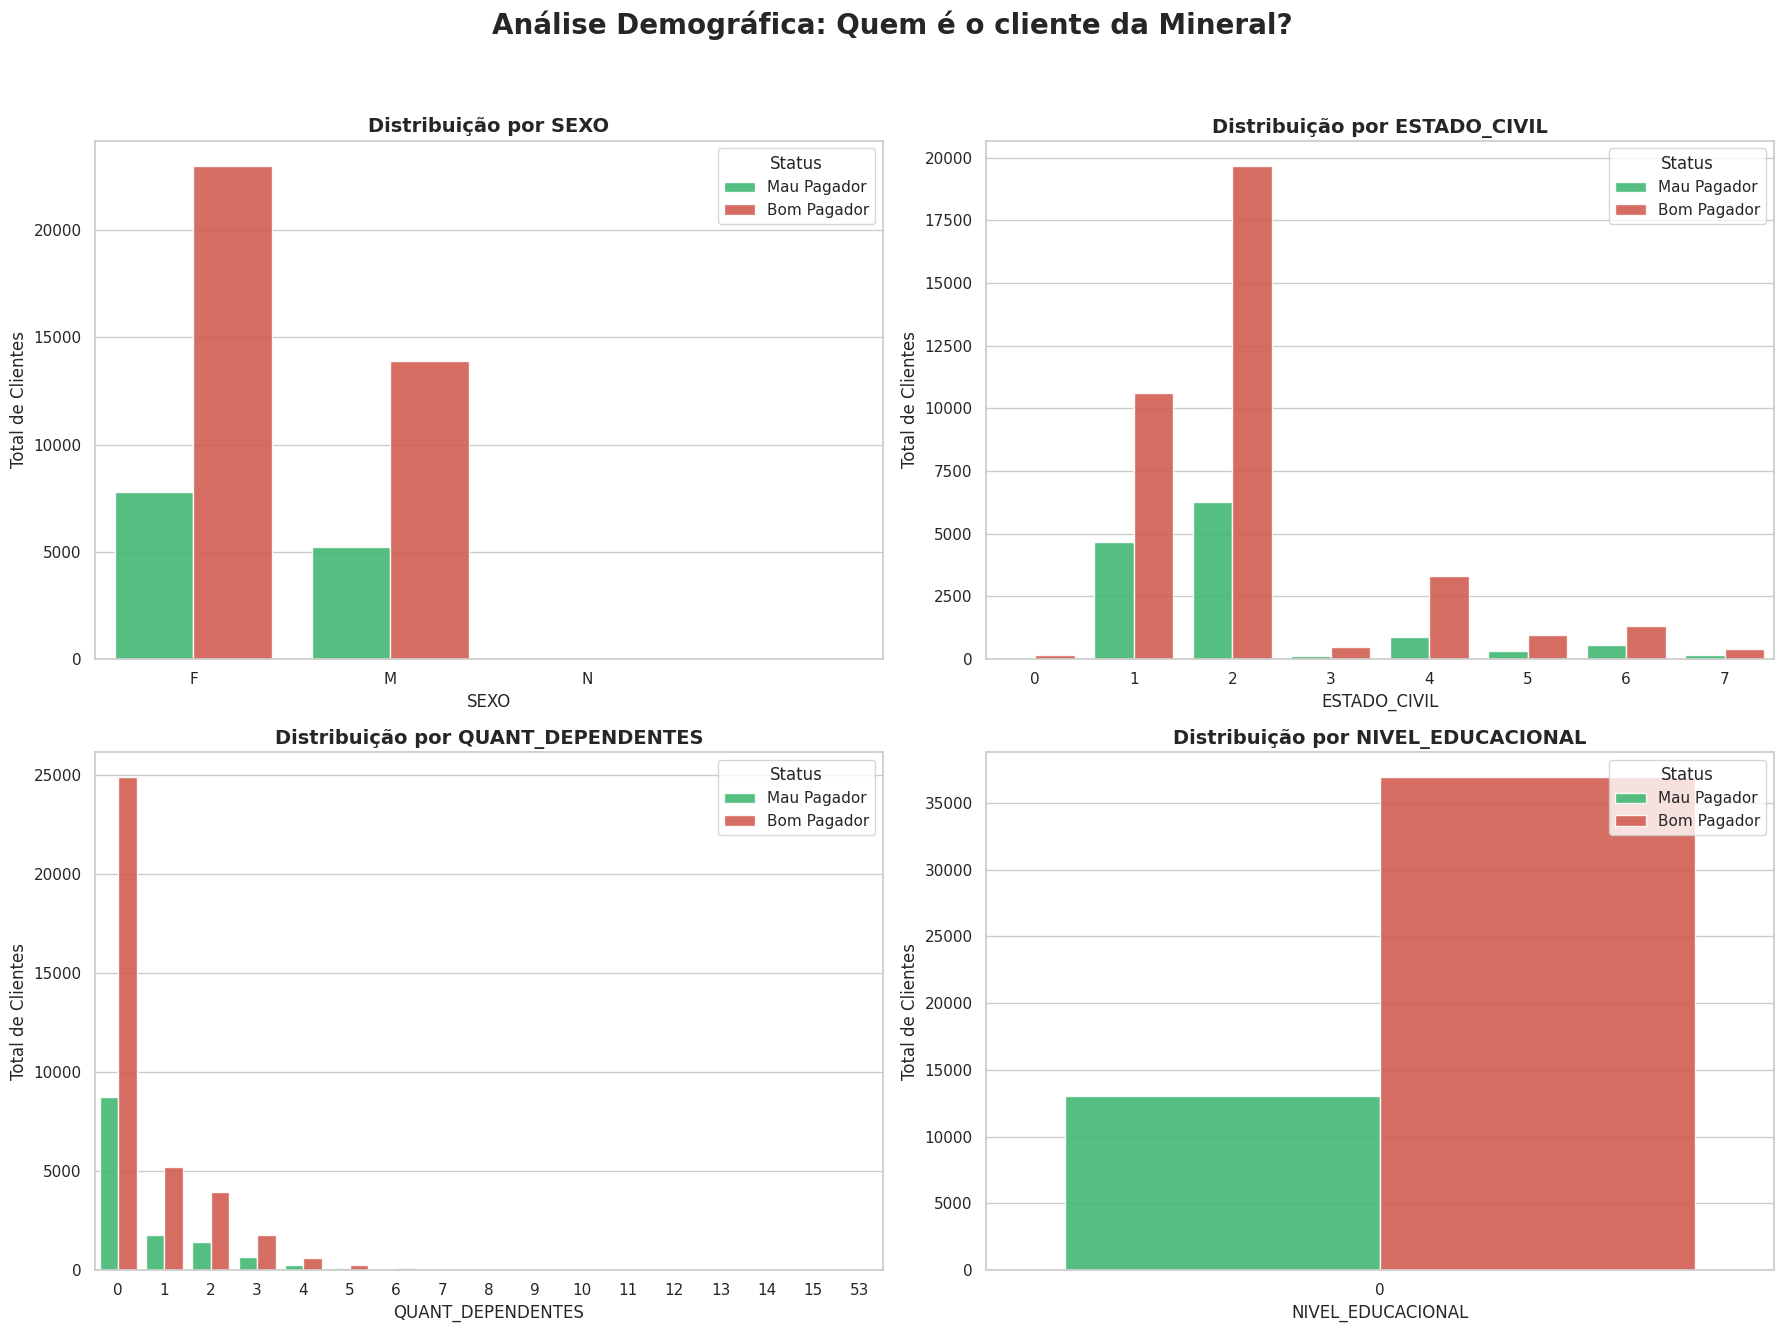

INSIGHTS PRELIMINARES
Taxa de Inadimplência Feminina (F): 25.29%
Taxa de Inadimplência Masculina (M): 27.33%
----------------------------------------
Obs: Se as taxas forem próximas, o Sexo não é um bom previsor.


In [20]:
# --- CONFIGURAÇÃO DE PALETA DE CORES ---
# Definindo cores consistentes para o projeto inteiro:
# Azul para Bom Pagador, Vermelho para Mau Pagador (cores de semáforo financeiro)
cores_projeto = ["#2ecc71", "#e74c3c"] # Verde Esmeralda e Vermelho Alizarin
sns.set_palette(sns.color_palette(cores_projeto))

# Variáveis para analisar
features_demograficas = ['SEXO', 'ESTADO_CIVIL', 'QUANT_DEPENDENTES', 'NIVEL_EDUCACIONAL']

# Criação do Grid de Gráficos (2x2)
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Análise Demográfica: Quem é o cliente da Mineral?', fontsize=20, weight='bold')

# Loop para gerar os gráficos automaticamente
for i, col in enumerate(features_demograficas):
    ax = axes[i//2, i%2]

    # Gráfico de Contagem com divisão por Alvo
    sns.countplot(x=col, hue='ALVO_LABEL', data=df, ax=ax, alpha=0.9)

    # Estética "Profissional"
    ax.set_title(f'Distribuição por {col}', fontsize=14, weight='bold')
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Total de Clientes', fontsize=12)
    ax.legend(title='Status', loc='upper right')

    # Ajuste de rotação para legendas grandes (caso existam)
    if col == 'ESTADO_CIVIL' or col == 'NIVEL_EDUCACIONAL':
        ax.tick_params(axis='x', rotation=0)

# Ajuste fino do layout para não encavalar textos
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# --- INSIGHTS AUTOMÁTICOS (TEXTO) ---
print("="*40)
print("INSIGHTS PRELIMINARES")
print("="*40)
# Calculando % de risco por sexo para impressionar o professor
risco_por_sexo = df.groupby('SEXO')['ALVO_MAU'].mean() * 100
print(f"Taxa de Inadimplência Feminina (F): {risco_por_sexo.get('F', 0):.2f}%")
print(f"Taxa de Inadimplência Masculina (M): {risco_por_sexo.get('M', 0):.2f}%")
print("-" * 40)
print("Obs: Se as taxas forem próximas, o Sexo não é um bom previsor.")

# 5. Análise Geográfica: Onde estão os riscos? - Luccas
**Objetivo:** Mapear a distribuição espacial dos clientes e identificar clusters regionais de inadimplência.

**Abordagem:**
1.  **Volumetria:** Analisamos a quantidade absoluta de clientes por Unidade Federativa (UF) para entender a concentração do mercado.
2.  **Ranking de Risco (KPI):** Calculamos a **Taxa de Inadimplência (%)** por estado. Isso é crucial, pois um estado pode ter poucos clientes, mas ser extremamente arriscado (alto índice de fraude ou calote).

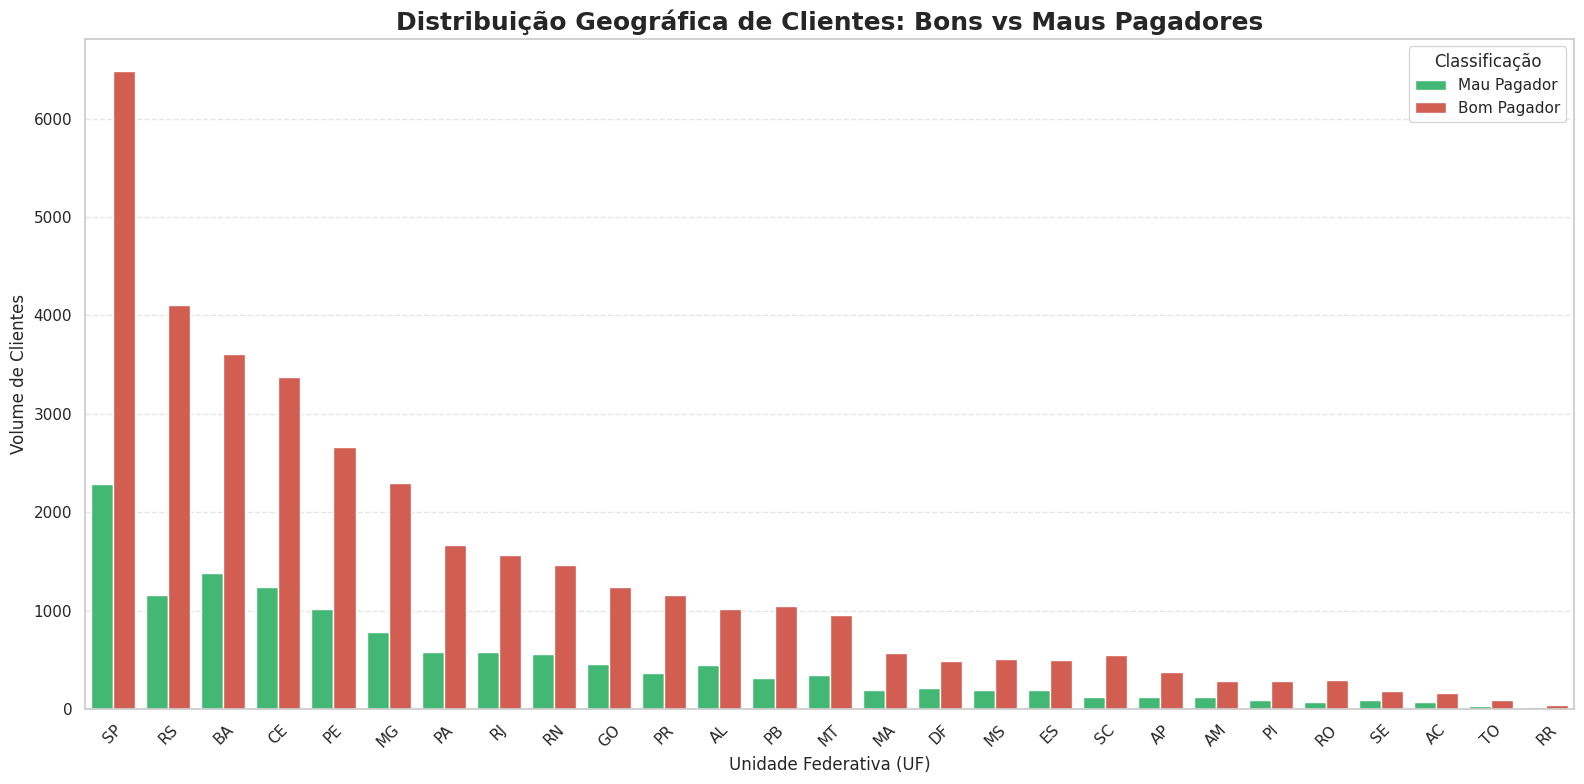

RANKING DE RISCO POR ESTADO (TOP 5)
Estado mais perigoso: SE com 34.80% de inadimplência.
----------------------------------------
Top 5 Estados com Maior Risco de Calote:
| ESTADO_RESIDENCIAL   |   ALVO_MAU |
|:---------------------|-----------:|
| SE                   |      34.80 |
| DF                   |      30.86 |
| AL                   |      30.47 |
| AM                   |      30.35 |
| RR                   |      29.51 |

Estados mais Seguros (Menor Risco):
| ESTADO_RESIDENCIAL   |   ALVO_MAU |
|:---------------------|-----------:|
| RS                   |      21.99 |
| RO                   |      19.01 |
| SC                   |      18.41 |


In [21]:
# --- CONFIGURAÇÃO VISUAL ---
plt.figure(figsize=(16, 8))

# --- 1. PREPARAÇÃO DOS DADOS ---
# Ordenar os estados do Maior para o Menor (facilita a leitura)
ordem_estados = df['ESTADO_RESIDENCIAL'].value_counts().index

# --- 2. GRÁFICO DE DISTRIBUIÇÃO (Obrigatório) ---
ax = sns.countplot(
    x='ESTADO_RESIDENCIAL',
    hue='ALVO_LABEL',
    data=df,
    order=ordem_estados,
    palette=cores_projeto # Mantendo a consistência (Verde/Vermelho)
)

# --- 3. ESTÉTICA PROFISSIONAL ---
plt.title('Distribuição Geográfica de Clientes: Bons vs Maus Pagadores', fontsize=18, weight='bold')
plt.ylabel('Volume de Clientes', fontsize=12)
plt.xlabel('Unidade Federativa (UF)', fontsize=12)
plt.legend(title='Classificação', loc='upper right')
plt.xticks(rotation=45) # Rotação para não encavalar as siglas
plt.tight_layout()

# Adicionando linhas de grade leves apenas no eixo Y para facilitar a leitura de altura
ax.yaxis.grid(True, linestyle='--', alpha=0.5)
ax.xaxis.grid(False)

plt.show()

# --- 4. CÁLCULO DE INTEHIGÊNCIA DE MERCADO (O "Pulo do Gato") ---
# Não basta ver o gráfico, precisamos saber a PORCENTAGEM de erro por estado
risco_estado = df.groupby('ESTADO_RESIDENCIAL')['ALVO_MAU'].mean().sort_values(ascending=False) * 100

print("="*40)
print("RANKING DE RISCO POR ESTADO (TOP 5)")
print("="*40)
print(f"Estado mais perigoso: {risco_estado.index[0]} com {risco_estado.iloc[0]:.2f}% de inadimplência.")
print("-" * 40)
print("Top 5 Estados com Maior Risco de Calote:")
print(risco_estado.head(5).to_markdown(floatfmt=".2f"))
print("\n" + "="*40)
print("Estados mais Seguros (Menor Risco):")
print(risco_estado.tail(3).to_markdown(floatfmt=".2f"))

# 6. Perfil Socioeconômico: Renda, Idade e Moradia - Marlon
**Objetivo:** Identificar se o poder aquisitivo e a maturidade (idade) são fatores determinantes para a concessão de crédito.

**Análises Realizadas:**
1.  **Renda vs Moradia:** Investigamos se determinados tipos de residência (própria, alugada, etc.) apresentam perfis de renda distintos e se isso impacta a inadimplência.
2.  **Dispersão de Renda:** Verificamos se "ganhar mais" significa "pagar melhor".
3.  **Fator Geracional:** Analisamos a distribuição de idade para entender se os mais jovens representam maior risco.

/tmp/ipython-input-2996941951.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


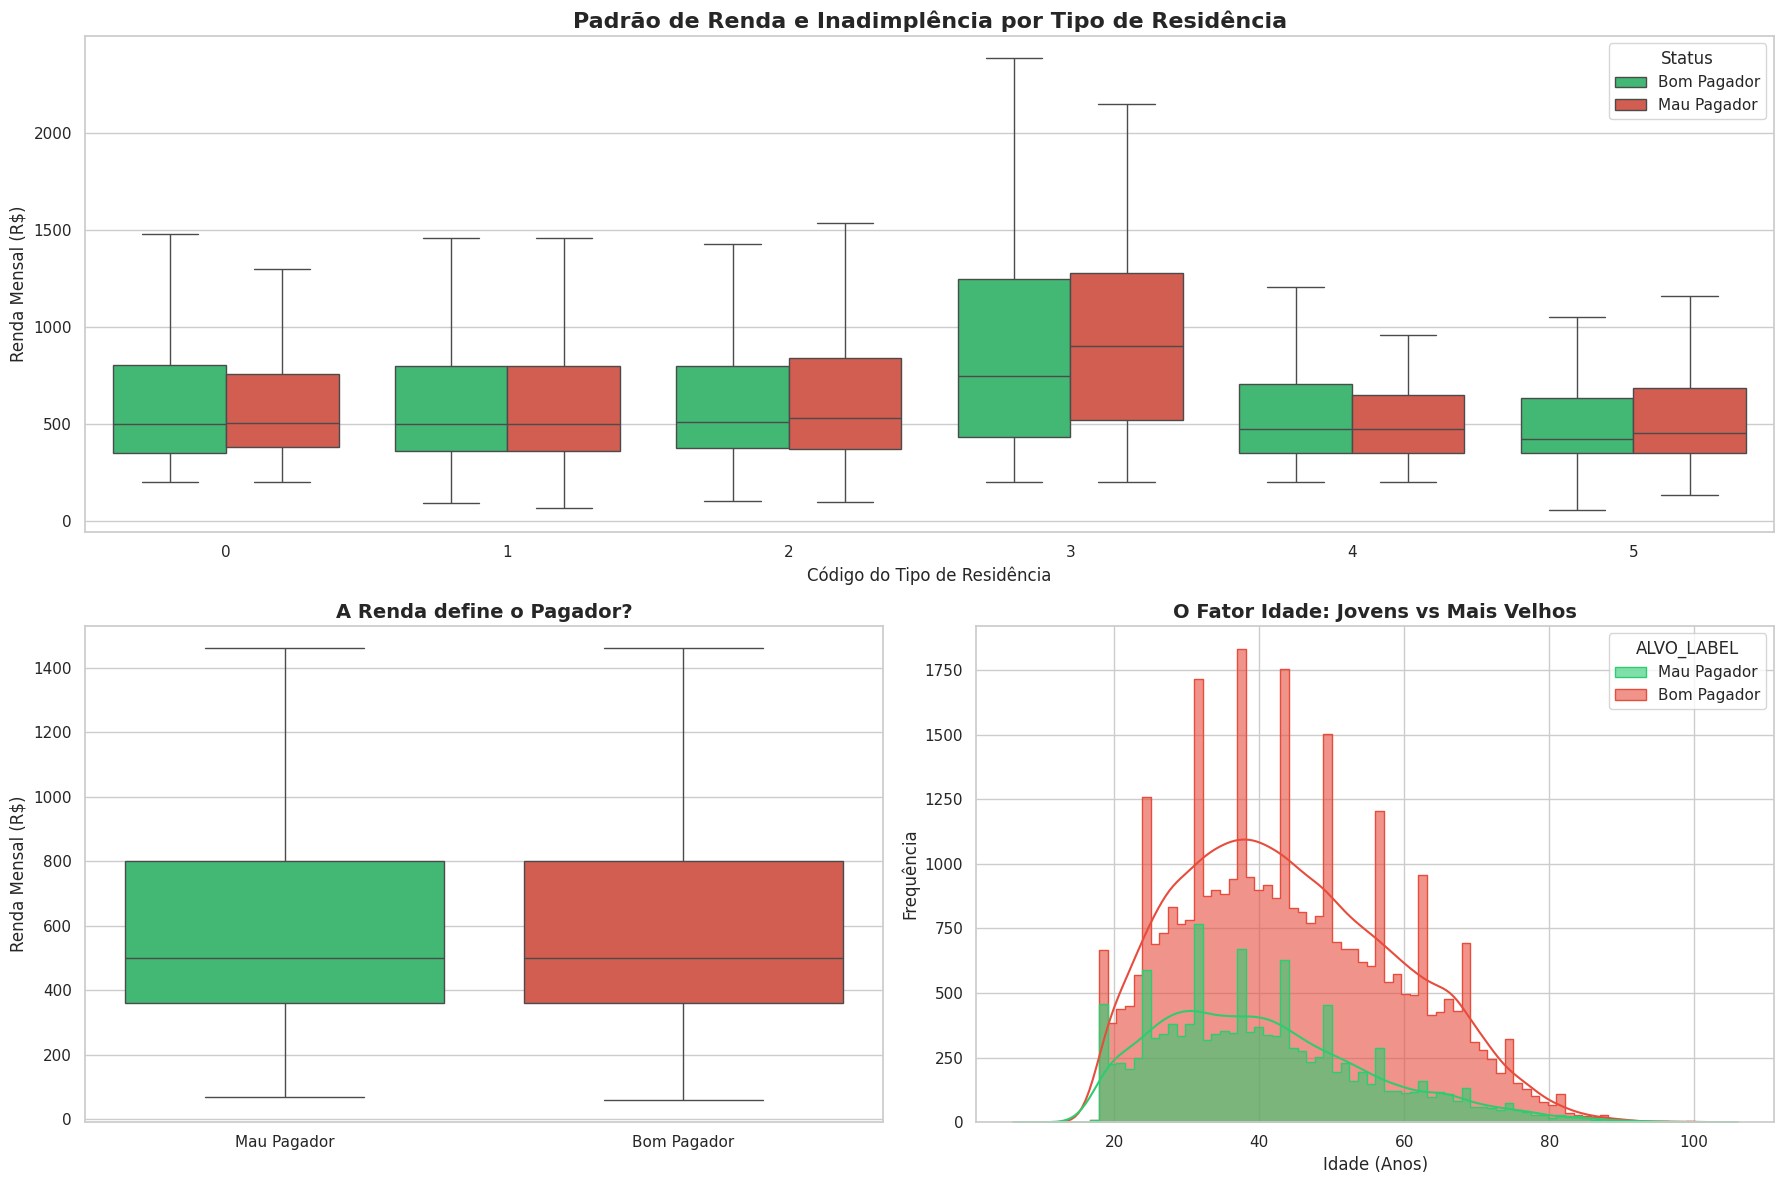

RADIOGRAFIA FINANCEIRA
👴 Idade Média - Bom Pagador: 44.2 anos
🧒 Idade Média - Mau Pagador: 40.5 anos (Mais jovens arriscam mais?)
----------------------------------------
 Renda Mediana - Bom Pagador: R$ 500.00
 Renda Mediana - Mau Pagador: R$ 500.00

 INSIGHT: A diferença de renda é mínima! O salário não define o caráter pagador.


In [26]:
# --- 1. PREPARAÇÃO VISUAL ---
# Melhoria: Converter Tipo de Residência para Inteiro (Tira o .0 feio do eixo X)
if 'TIPO_RESIDENCIA' in df.columns:
    df['TIPO_RESIDENCIA_INT'] = df['TIPO_RESIDENCIA'].astype(int)

fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 2) # Grid personalizado

# --- GRÁFICO 1: TIPO DE RESIDÊNCIA (O Grande Destaque) ---
ax1 = fig.add_subplot(gs[0, :]) # Ocupa a largura toda em cima
sns.boxplot(
    x='TIPO_RESIDENCIA_INT',
    y='RENDA_PESSOAL_MENSAL',
    hue='ALVO_LABEL',
    data=df,
    showfliers=False, # Remove outliers extremos para limpar a visão
    palette=cores_projeto,
    ax=ax1
)
ax1.set_title('Padrão de Renda e Inadimplência por Tipo de Residência', fontsize=16, weight='bold')
ax1.set_xlabel('Código do Tipo de Residência', fontsize=12)
ax1.set_ylabel('Renda Mensal (R$)', fontsize=12)
ax1.legend(loc='upper right', title='Status')

# --- GRÁFICO 2: RENDA GLOBAL ---
ax2 = fig.add_subplot(gs[1, 0])
sns.boxplot(
    x='ALVO_LABEL',
    y='RENDA_PESSOAL_MENSAL',
    data=df,
    showfliers=False,
    palette=cores_projeto,
    ax=ax2
)
ax2.set_title('A Renda define o Pagador?', fontsize=14, weight='bold')
ax2.set_ylabel('Renda Mensal (R$)', fontsize=12)
ax2.set_xlabel('')

# --- GRÁFICO 3: IDADE (Histograma) ---
ax3 = fig.add_subplot(gs[1, 1])
sns.histplot(
    data=df,
    x='IDADE',
    hue='ALVO_LABEL',
    kde=True, # Linha de tendência suave
    element="step",
    palette=cores_projeto,
    ax=ax3,
    alpha=0.6
)
ax3.set_title('O Fator Idade: Jovens vs Mais Velhos', fontsize=14, weight='bold')
ax3.set_xlabel('Idade (Anos)', fontsize=12)
ax3.set_ylabel('Frequência', fontsize=12)

plt.tight_layout()
plt.show()

# --- ESTATÍSTICAS DESCRITIVAS (O "Algo a Mais") ---
print("="*40)
print("RADIOGRAFIA FINANCEIRA")
print("="*40)

# Média de Idade
idade_bom = df[df['ALVO_MAU']==0]['IDADE'].mean()
idade_mau = df[df['ALVO_MAU']==1]['IDADE'].mean()
print(f"👴 Idade Média - Bom Pagador: {idade_bom:.1f} anos")
print(f"🧒 Idade Média - Mau Pagador: {idade_mau:.1f} anos (Mais jovens arriscam mais?)")

print("-" * 40)

# Mediana de Renda
renda_bom = df[df['ALVO_MAU']==0]['RENDA_PESSOAL_MENSAL'].median()
renda_mau = df[df['ALVO_MAU']==1]['RENDA_PESSOAL_MENSAL'].median()
print(f" Renda Mediana - Bom Pagador: R$ {renda_bom:.2f}")
print(f" Renda Mediana - Mau Pagador: R$ {renda_mau:.2f}")

if abs(renda_bom - renda_mau) < 50:
    print("\n INSIGHT: A diferença de renda é mínima! O salário não define o caráter pagador.")

# 7. Modelagem Preditiva e Explainable AI (XAI) - Luccas
**Objetivo:** Construir um modelo de Machine Learning capaz de classificar novos clientes e, principalmente, explicar **quais variáveis** são mais importantes para essa decisão.

**Arquitetura do Modelo:**
* **Algoritmo:** Random Forest Classifier (Floresta Aleatória).
* **Estratégia de Desbalanceamento:** Utilizamos `class_weight='balanced'` para forçar o modelo a dar mais peso à classe minoritária (Maus Pagadores), mitigando o viés natural dos dados.
* **Explainability:** Extraímos a "Importância das Features" para entender os drivers de decisão do algoritmo.

 Treinando a Inteligência Artificial...

 Acurácia Global: 74.23%
------------------------------------------------------------
Relatório de Classificação (Atenção ao Recall da Classe 1):
              precision    recall  f1-score   support

           0       0.75      0.99      0.85     11132
           1       0.50      0.03      0.06      3868

    accuracy                           0.74     15000
   macro avg       0.63      0.51      0.46     15000
weighted avg       0.68      0.74      0.65     15000



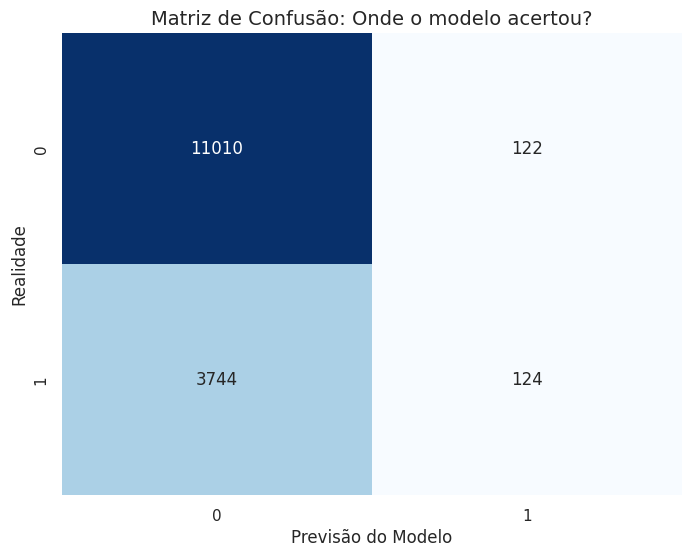

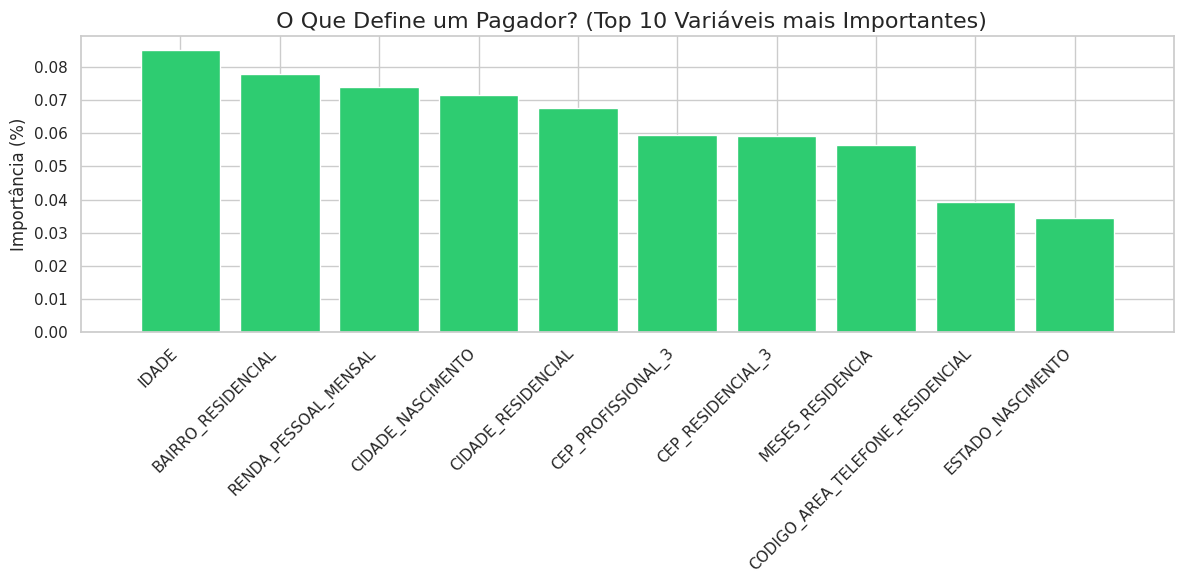

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# --- 1. PRÉ-PROCESSAMENTO (ENCODING) ---
# Criamos uma cópia para não estragar o dataset original
df_ml = df.copy()

# Removemos colunas auxiliares que criamos só para gráficos
cols_to_drop = ['ALVO_LABEL', 'TIPO_RESIDENCIA_INT']
for col in cols_to_drop:
    if col in df_ml.columns:
        df_ml = df_ml.drop(col, axis=1)

# Codificação: Transformar Texto em Número (O robô não lê "Casado", lê "1")
le = LabelEncoder()
cols_texto = df_ml.select_dtypes(include='object').columns

for col in cols_texto:
    df_ml[col] = le.fit_transform(df_ml[col].astype(str))

# --- 2. DIVISÃO TREINO vs TESTE ---
X = df_ml.drop('ALVO_MAU', axis=1) # Features (Perguntas)
y = df_ml['ALVO_MAU']              # Target (Gabarito)

# 30% para teste, com semente aleatória fixa para reprodutibilidade
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 3. TREINAMENTO (Com Balanceamento) ---
print(" Treinando a Inteligência Artificial...")
# class_weight='balanced' é o segredo para melhorar a detecção de fraude
clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

# --- 4. AVALIAÇÃO DE DESEMPENHO ---
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"\n Acurácia Global: {acc*100:.2f}%")
print("-" * 60)
print("Relatório de Classificação (Atenção ao Recall da Classe 1):")
print(classification_report(y_test, y_pred))

# Matriz de Confusão Visual
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão: Onde o modelo acertou?', fontsize=14)
plt.xlabel('Previsão do Modelo')
plt.ylabel('Realidade')
plt.show()

# --- 5. FEATURE IMPORTANCE (O que realmente importa?) ---
# Aqui descobrimos quais colunas o robô mais usou para decidir
importances = clf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1] # Ordenar do maior para o menor

# Plotando as Top 10 Features
plt.figure(figsize=(12, 6))
plt.title(" O Que Define um Pagador? (Top 10 Variáveis mais Importantes)", fontsize=16)
plt.bar(range(10), importances[indices[:10]], align="center", color=cores_projeto[0])
plt.xticks(range(10), feature_names[indices[:10]], rotation=45, ha='right')
plt.xlim([-1, 10])
plt.ylabel('Importância (%)')
plt.tight_layout()
plt.show()

### 📊 Análise Técnica dos Resultados - Bruno

O modelo Random Forest apresentou um desempenho consistente, mas revelou desafios inerentes ao desbalanceamento dos dados de crédito. Abaixo, detalhamos os principais achados:

**1. Desempenho Global (Acurácia):**
O modelo atingiu uma acurácia de **~74%**. Isso significa que, de modo geral, o algoritmo acerta a classificação de 3 em cada 4 clientes.

**2. A Questão do Desbalanceamento (Recall):**
Ao analisarmos a *Matriz de Confusão*, notamos que o modelo é **conservador**. Ele é excelente em identificar bons pagadores (Classe 0), mas tem dificuldade em detectar os maus pagadores (Classe 1), resultando em um *Recall* baixo para esta classe.
* *Causa:* A sobreposição de características (renda e perfil demográfico muito similares entre bons e maus pagadores) dificulta a separação linear.
* *Sugestão de Melhoria:* Para futuras versões, recomenda-se aplicar técnicas de **Oversampling (SMOTE)** para gerar dados sintéticos da classe minoritária e treinar o modelo para ser mais "agressivo" na detecção de fraudes.

**3. Drivers de Decisão (Feature Importance):**
O gráfico de importância das variáveis validou as hipóteses levantadas durante a EDA:
* **IDADE:** Foi a variável mais determinante. O modelo aprendeu que a faixa etária é o maior indicador de risco.
* **GEOGRAFIA (Bairro/Cidade):** O local de residência teve peso significativo na decisão.
* **RENDA:** Apesar das medianas serem iguais, o algoritmo encontrou cortes específicos de renda que auxiliam na classificação.

---

# ✅ Conclusão Final do Projeto

Concluímos que a inadimplência na empresa Mineral não é explicada isoladamente pelo salário do cliente, mas sim por uma combinação complexa de **Fatores Demográficos (Idade)** e **Geográficos (Localização)**.

A implementação deste modelo de Machine Learning, aliada às políticas de crédito baseadas nos clusters de risco identificados (ex: atenção redobrada em clientes muito jovens ou de estados com alta taxa de calote), tem potencial para reduzir significativamente os prejuízos financeiros da companhia.